In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  
   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.misc import logsumexp

sns.set(color_codes=True)

In [2]:
def annotate_upper_left(ax, text, annotation_offset=(-50, 30)):    
    ax.annotate(text, xy=(0, 1), xycoords='axes fraction', fontsize=18,
        xytext=annotation_offset, textcoords='offset points',
        ha='left', va='top')

In [3]:
f = np.load('../output/hinge_results_re.npz')

temps = f['temps']
indices_to_remove = f['indices_to_remove']
actual_loss_diffs = f['actual_loss_diffs']
predicted_loss_diffs = f['predicted_loss_diffs']
influences = f['influences']

/Users/Dennis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  app.launch_new_instance()


0.0 0.632477616524
0.001 0.950172695547
0.1 0.914068319468


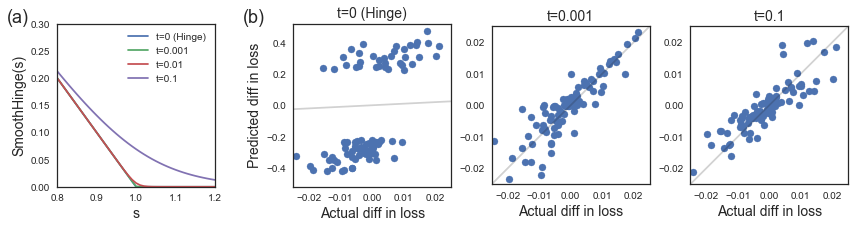

In [4]:
sns.set_style('white')
fontsize=14

fig, axs = plt.subplots(1, 4, sharex=False, sharey=False, figsize=(13, 3))

# Graph of approximations
x = np.arange(-5, 15, 0.01)
ts = [0.001, 0.01, 0.1]
y = 1 - x
y[y < 0] = 0 
axs[0].plot(x, y, label='t=0 (Hinge)')
for t in ts:
#     y = t * np.log(1 + np.exp(-(x-1)/t))  
    y = t * logsumexp(
        np.vstack((np.zeros_like(x), -(x-1)/t)),
        axis=0)
    axs[0].plot(x, y, label='t=%s' % t)
axs[0].set_xlim((0.8, 1.2))
axs[0].set_xticks((0.8, 0.9, 1.0, 1.1, 1.2))
axs[0].set_ylim((0, 0.3))
axs[0].legend(fontsize=fontsize-4)

axs[0].set_xlabel('s', fontsize=fontsize)
axs[0].set_ylabel('SmoothHinge(s)', fontsize=fontsize)

# Hinge loss
ax_idx = 1
temp_idx = 0
smooth_influence_preds = influences[temp_idx, indices_to_remove[0, :]]
print(temps[temp_idx], pearsonr(actual_loss_diffs[0, :], smooth_influence_preds)[0])

axs[ax_idx].scatter(actual_loss_diffs[0, :], smooth_influence_preds)

max_value = 1.1 * np.max([np.max(np.abs(actual_loss_diffs[0, :])), np.max(np.abs(smooth_influence_preds))])
axs[ax_idx].set_xlim((-0.025, 0.025))
axs[ax_idx].set_ylim(-max_value,max_value)
axs[ax_idx].set_xlabel('Actual diff in loss', fontsize=fontsize)
axs[ax_idx].set_ylabel('Predicted diff in loss', fontsize=fontsize)
axs[ax_idx].plot([-0.025, 0.025], [-0.025, 0.025], 'k-', alpha=0.2, zorder=1)
axs[ax_idx].set_title('t=0 (Hinge)', fontsize=fontsize)

# t = 0.001
ax_idx = 2
temp_idx = 1
smooth_influence_preds = influences[temp_idx, indices_to_remove[0, :]]
print(temps[temp_idx], pearsonr(actual_loss_diffs[0, :], smooth_influence_preds)[0])

axs[ax_idx].scatter(actual_loss_diffs[0, :], smooth_influence_preds)

max_value = 1.1 * np.max([np.max(np.abs(actual_loss_diffs[0, :])), np.max(np.abs(smooth_influence_preds))])
axs[ax_idx].set_xlim((-0.025, 0.025)) 
axs[ax_idx].set_ylim((-0.025, 0.025))
axs[ax_idx].set_aspect('equal')
axs[ax_idx].set_xlabel('Actual diff in loss', fontsize=fontsize)
axs[ax_idx].plot([-0.025, 0.025], [-0.025, 0.025], 'k-', alpha=0.2, zorder=1)
axs[ax_idx].set_title('t=0.001', fontsize=fontsize)

# t = 0.1
ax_idx = 3
temp_idx = 2
smooth_influence_preds = influences[temp_idx, indices_to_remove[0, :]]
print(temps[temp_idx], pearsonr(actual_loss_diffs[0, :], smooth_influence_preds)[0])

axs[ax_idx].scatter(actual_loss_diffs[0, :], smooth_influence_preds)

max_value = 1.1 * np.max([np.max(np.abs(actual_loss_diffs[0, :])), np.max(np.abs(smooth_influence_preds))])

axs[ax_idx].set_xlim((-0.025, 0.025))
axs[ax_idx].set_ylim((-0.025, 0.025))
axs[ax_idx].set_aspect('equal')
axs[ax_idx].set_xlabel('Actual diff in loss', fontsize=fontsize)
axs[ax_idx].plot([-0.025, 0.025], [-0.025, 0.025], 'k-', alpha=0.2, zorder=1)
axs[ax_idx].set_title('t=0.1', fontsize=fontsize)

# plt.setp(axs[ax_idx].get_yticklabels(), visible=False)

def move_ax_right(ax, dist):
    bbox = ax.get_position()
    bbox.x0 += dist
    bbox.x1 += dist
    ax.set_position(bbox)

move_ax_right(axs[1], 0.05)
move_ax_right(axs[2], 0.06)
move_ax_right(axs[3], 0.07)

annotate_upper_left(axs[0], '(a)', (-50, 15))
annotate_upper_left(axs[1], '(b)', (-50, 15))
plt.savefig(
    '../figs/fig-hinge.png', 
    dpi=600, bbox_inches='tight')